In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from artcv.model import ArtCV
from artcv.trainer import Trainer
from artcv.datatool import ImgDataset, TrainValSet
torch.cuda.is_available()

True

In [3]:
# indices = [i for i in range(0, 2096)]
indices = None
dataset = TrainValSet(indices=indices)

In [4]:
model = ArtCV()

In [5]:
trainer = Trainer(model, dataset, batch_size_train=32)

In [6]:
trainer.train()

Training progress:   4%|▍         | 4/100 [1:30:19<37:00:37, 1387.89s/it]

/home/duai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Training progress:  16%|█▌        | 16/100 [9:27:20<49:38:30, 2127.51s/it]


KeyboardInterrupt: 

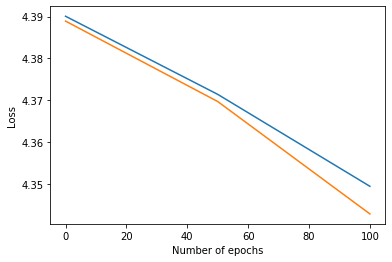

In [7]:
trainer.loss_history_plot()

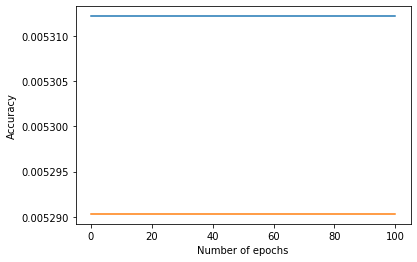

In [8]:
trainer.accuracy_history_plot()

In [6]:
itertool = iter(trainer.dataloader_train)
img, y0, y1, y2, y3, y4 = itertool.next()

In [24]:
ground_truth = []
ground_truth += [torch.cat((y0.long().cpu(),
                                        y1.long().cpu(),
                                        F.one_hot(y2, num_classes=6).squeeze()[:, 1:].long().cpu(),
                                        y3.long().cpu(),
                                        y4.long().cpu()), dim=1)]
ground_truth += [torch.cat((y0.long().cpu(),
                                        y1.long().cpu(),
                                        F.one_hot(y2, num_classes=6).squeeze()[:, 1:].long().cpu(),
                                        y3.long().cpu(),
                                        y4.long().cpu()), dim=1)]

In [10]:
y_concat_prob = model.get_concat_probs(img.cuda())

In [13]:
predictions_tem = []
predictions_tem += [y_concat_prob.cpu()]
predictions_tem += [y_concat_prob.cpu()]

In [20]:
predictions_tem

[tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5051, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
        grad_fn=<CopyBackwards>),
 tensor([[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5051, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         ...,
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
         [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]],
        grad_fn=<CopyBackwards>)]

In [25]:
torch.cat(ground_truth).detach().numpy().shape

(64, 3474)

In [18]:
predictions_array = torch.cat(predictions_tem).detach().numpy()

In [21]:
predictions_array.shape

(64, 3474)

In [16]:
F.one_hot(y2, num_classes=6).squeeze()[:, 1:].long().cpu()


tensor([[0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [20]:
torch.nn.functional.one_hot(y2, num_classes=6).squeeze()[:, 1:]

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]])

In [7]:
y_pred0, y_pred1, y_pred2, y_pred3, y_pred4 = model.get_probs(img.cuda())

In [15]:
y_pred0.shape

torch.Size([16, 100])

In [20]:
torch.mean(torch.nn.functional.binary_cross_entropy(y_pred1, y1, reduction='none'), dim=1)

RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'target' in call to _thnn_binary_cross_entropy_forward